In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('zomato.csv')
df

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...   
9547  Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...   
9548  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9550  Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karak�_y   
9547                                   Ko��uyolu   
9548                                 Kuru�_e��me   
9549                                 Kuru�_e��me   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karak�_y, ��stanbul   28.977392   
9547                               Ko��uyolu, ��stanbul   29.041297   
9548                             Kuru�_e��me, ��stanbul   29.034640   
9549                             Kuru�_e��me, ��stanbul   29.036019   
9550                                    Moda, ��stanbul   29.026016   

       Latitude                          Cuisines  ...          Currency  \
0     14.565443        French, Japanese, Desserts  ...  Botswana Pula(P)   
1     14.553708                          Japanese  ...  Botswana Pula(P)   
2     14.581404  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)   
3     14.585318                   Japanese, Sushi  ...  Botswana Pula(P)   
4     14.584450                  Japanese, Korean  ...  Botswana Pula(P)   
...         ...                               ...  ...               ...   
9546  41.022793                           Turkish  ...  Turkish Lira(TL)   
9547  41.009847   World Cuisine, Patisserie, Cafe  ...  Turkish Lira(TL)   
9548  41.055817            Italian, World Cuisine  ...  Turkish Lira(TL)   
9549  41.057979                   Restaurant Cafe  ...  Turkish Lira(TL)   
9550  40.9

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# checking if data set contains any null values

In [4]:
df.isnull().sum().any()

True

In [5]:
nan_values = df.isna()
nan_columns = nan_values.any()

columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)

['Cuisines']


In [6]:
df['Cuisines'].isna().sum().any()

True

cuisines have some null values which is treated further

In [7]:
df['Cuisines'].value_counts()

North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64

There is another file which is also available along with dataset

In [8]:
df1=pd.read_csv("Country-Code.csv")
df1

Country Code         Country
0              1           India
1             14       Australia
2             30          Brazil
3             37          Canada
4             94       Indonesia
5            148     New Zealand
6            162     Phillipines
7            166           Qatar
8            184       Singapore
9            189    South Africa
10           191       Sri Lanka
11           208          Turkey
12           214             UAE
13           215  United Kingdom
14           216   United States

In [9]:
df2=pd.merge(df,df1,on='Country Code',how='left')

In [10]:
df2.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...  Has Table booking  \
0        French, Japanese, Desserts  ...                Yes   
1                          Japanese  ...                Yes   
2  Seafood, Asian, Filipino, Indian  ...                Yes   
3                   Japanese, Sushi  ...                 No   
4                  Japanese, Korean  ...                Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

  Aggregate rating  Rating color  Rating text Votes      Country  
0              4.8    Dark Green    Excellent   314  Phillipines  
1              4.5    Dark Green    Excellent   591  Phillipines  
2              4.4         Green    Very Good   270  Phillipines  
3              4.9    Dark Green    Excellent   365  Phillipines  
4              4.8    Dark Green    Excellent   229  Phillipines  

[5 rows x 22 columns]

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

There are 9551 Rows and 22 columns

There are 3 columns are float, 5 are int and 14 are object

Target varible is price range and Average cost of two both are int type
it is a regression problem

In [12]:
df2['Currency'].value_counts()

Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(��)                  80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: Currency, dtype: int64

In [13]:
for col in df.columns:
    print("Unique Value")
    print("              ")
    print(df[col].unique())
    print("no. of unique value",col,":", df[col].nunique())
    print(" ")

Unique Value
              
[6317637 6304287 6300002 ... 5915807 5916112 5927402]
no. of unique value Restaurant ID : 9551
 
Unique Value
              
['Le Petit Souffle' 'Izakaya Kikufuji' 'Heat - Edsa Shangri-La' ...
 'Huqqa' 'A���k Kahve' "Walter's Coffee Roastery"]
no. of unique value Restaurant Name : 7446
 
Unique Value
              
[162  30 216  14  37 184 214   1  94 148 215 166 189 191 208]
no. of unique value Country Code : 15
 
Unique Value
              
['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Bras�_lia'
 'Rio de Janeiro' 'S��o Paulo' 'Albany' 'Armidale' 'Athens' 'Augusta'
 'Balingup' 'Beechworth' 'Boise' 'Cedar Rapids/Iowa City' 'Chatham-Kent'
 'Clatskanie' 'Cochrane' 'Columbus' 'Consort' 'Dalton' 'Davenport'
 'Des Moines' 'Dicky Beach' 'Dubuque' 'East Ballina' 'Fernley' 'Flaxton'
 'Forrest' 'Gainesville' 'Hepburn Springs' 'Huskisson' 'Inverloch'
 'Lakes Entrance' 'Lakeview' 

<AxesSubplot:>

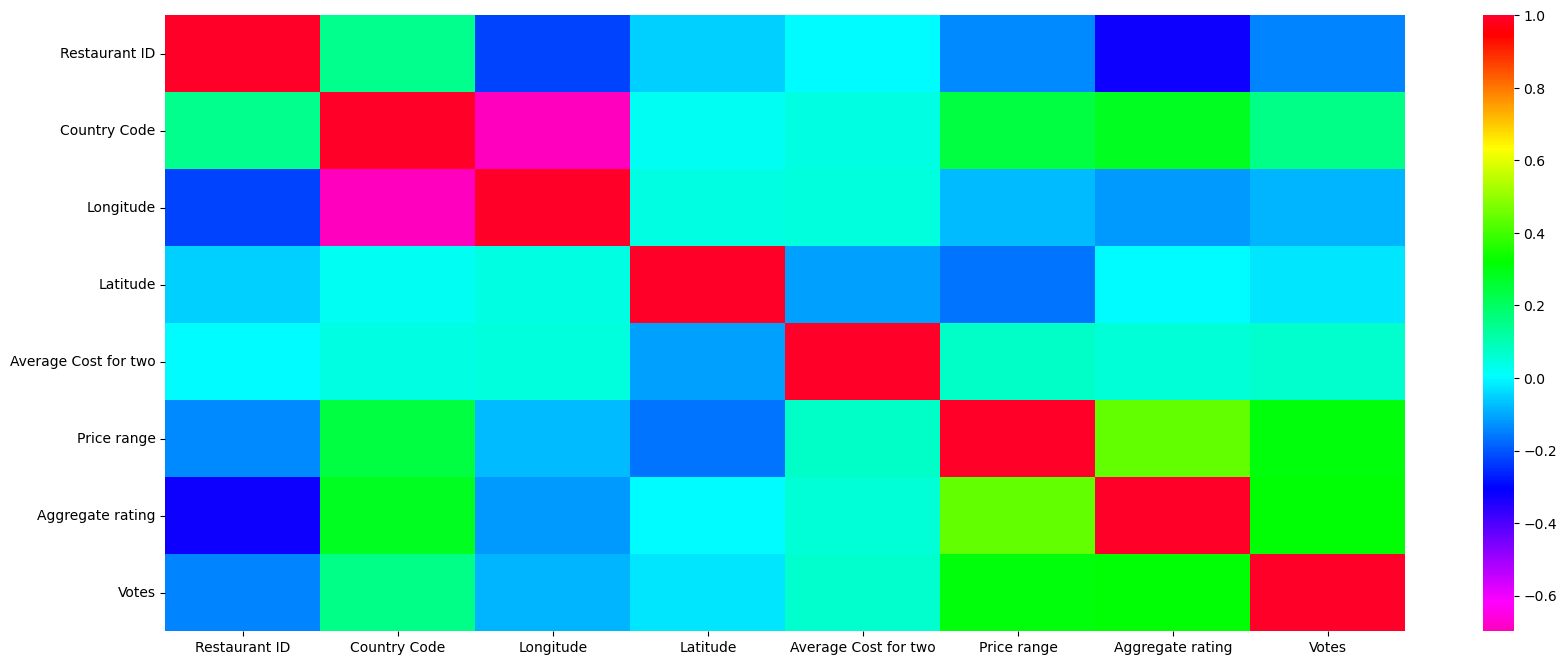

In [14]:
# plotting Correlation
plt.figure(figsize=(20,8))
sns.heatmap(df2.corr(),cmap='gist_rainbow_r')

some of the columns have no corelation

some of the is highly correlated like that price range, Aggregate rating and votes are correlted to each other

country code and Longitude are  Negatively correlate to each other

In [15]:
# cuisines has null values
df2['Cuisines'].mode()

0    North Indian
Name: Cuisines, dtype: object

In [16]:
df2['Cuisines'].fillna(df2['Cuisines'].mode()[0],inplace=True)

In [17]:
df2.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [18]:
value = df2['Country'].value_counts()
     


In [19]:
value

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

# visualise country and city

In [20]:
fig = px.sunburst(df2, path=['Country','City'])
fig.show()

Total no. of country is 15

Zomato is spread mostly in India and most popular city in Zomato are New Delhi, Gurgaon,Noida

# Now lets see Rating ,Rating color and text

In [21]:
# check their relation by group
rating=df2.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
rating

Aggregate rating Rating color Rating text  Rating Count
0                0.0        White   Not rated          2148
1                1.8          Red        Poor             1
2                1.9          Red        Poor             2
3                2.0          Red        Poor             7
4                2.1          Red        Poor            15
5                2.2          Red        Poor            27
6                2.3          Red        Poor            47
7                2.4          Red        Poor            87
8                2.5       Orange     Average           110
9                2.6       Orange     Average           191
10               2.7       Orange     Average           250
11               2.8       Orange     Average           315
12               2.9       Orange     Average           381
13               3.0       Orange     Average           468
14               3.1       Orange     Average           519
15               3.2       Orange     Average           522
16               3.3       Orange     Average           483
17               3.4       Orange     Average           498
18               3.5       Yellow        Good           480
19               3.6       Yellow        Good           458
20               3.7       Yellow        Good           427
21               3.8       Yellow        Good           400
22               3.9       Yellow        Good           335
23               4.0        Green   Very Good           266
24               4.1        Green   Very Good           274
25               4.2        Green   Very Good           221
26               4.3        Green   Very Good           174
27               4.4        Green   Very Good           144
28               4.5   Dark Green   Excellent            95
29               4.6   Dark Green   Excellent            78
30               4.7   Dark Green   Excellent            42
31               4.8   Dark Green   Excellent            25
32               4.9   Dark Green   Excellent            61

# from the above relation we find the relation between the columns

1. 0.0 Rating --> Not Rated --> white color
2. 1.8 to 2.4 Rating --> poor --> Red color
3. 2.5 to 3.5 Rating --> Average --> Orange
4. 3.5 to 3.9 Rating --> Good--> Yellow
5. 4.0 to 4.4 Rating --> very Good --> Green
6. 4.5 to 4.9 Rating --> Excellent --> Dark Green

In [22]:
%matplotlib inline
sns.set_style("darkgrid")

Text(0.5, 1.0, 'Rating')

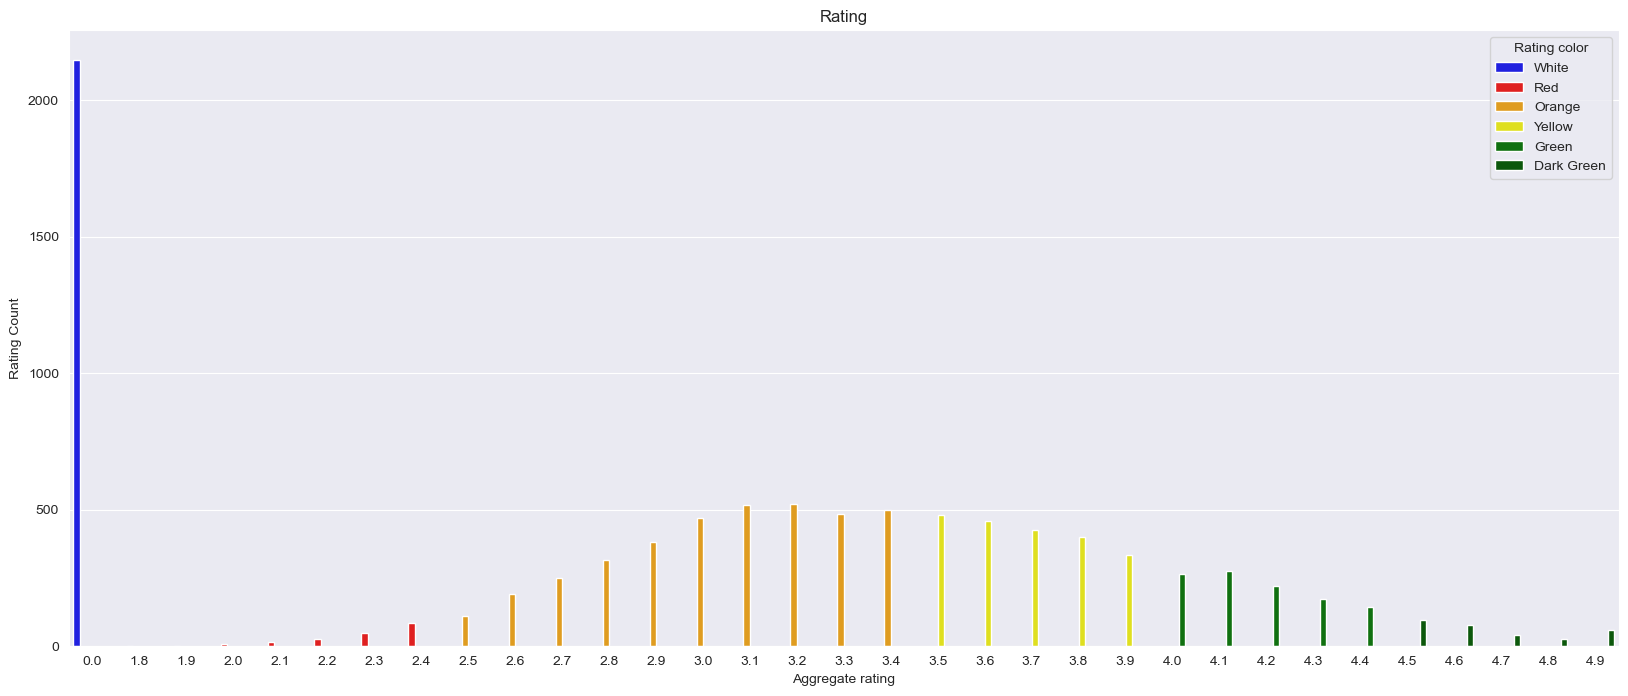

In [23]:
plt.figure(figsize=(20,8))
sns.barplot(x='Aggregate rating',y='Rating Count',data=rating,hue='Rating color',palette=['Blue','red','orange','yellow','Green','Darkgreen'])
plt.title('Rating')

it seems that maximum restaurant have gone no rating 

In [24]:
# let us check no ratin g restaurant
no_rating=df2[df2['Rating color']=='White'].groupby('Country').size().reset_index().rename(columns={0:"Rating Count"})
no_rating

Country  Rating Count
0          Brazil             5
1           India          2139
2  United Kingdom             1
3   United States             3

India seems to have maximum  unrated restaurant.In India the culture of ordering online food is still gaining momentum

In [25]:
# Let see Country and their currency
country=df2.groupby(['Country','Currency']).size()
country

Country         Currency              
Australia       Dollar($)                   24
Brazil          Brazilian Real(R$)          60
Canada          Dollar($)                    4
India           Indian Rupees(Rs.)        8652
Indonesia       Indonesian Rupiah(IDR)      21
New Zealand     NewZealand($)               40
Phillipines     Botswana Pula(P)            22
Qatar           Qatari Rial(QR)             20
Singapore       Dollar($)                   20
South Africa    Rand(R)                     60
Sri Lanka       Sri Lankan Rupee(LKR)       20
Turkey          Turkish Lira(TL)            34
UAE             Emirati Diram(AED)          60
United Kingdom  Pounds(��)                  80
United States   Dollar($)                  434
dtype: int64

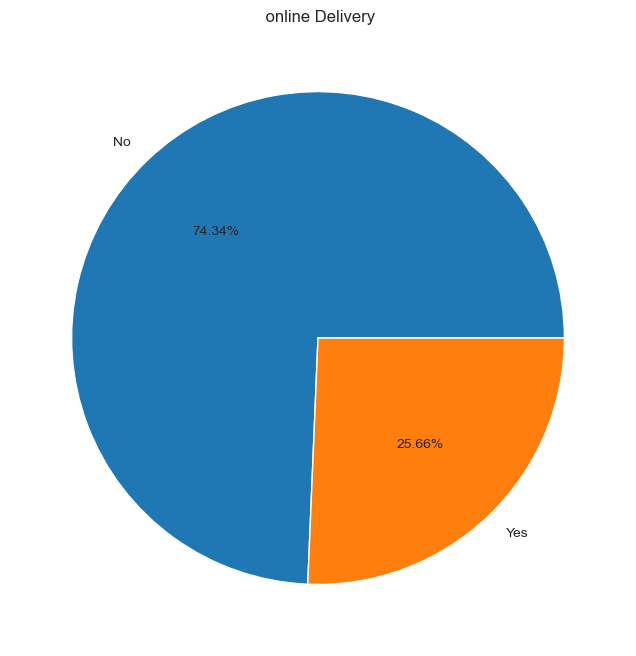

In [26]:
# let us Check online Delivery
plt.figure(figsize=(8,8))
plt.pie(df2['Has Online delivery'].value_counts()/9551*100,labels=df2['Has Online delivery'].value_counts().index,autopct='%1.2f%%')
plt.title(" online Delivery")
plt.show()

it seems 25% of the Restaurant accepts online delivery

In [27]:
country=df2.groupby(['Country','Has Online delivery']).size().sort_values(ascending=False).reset_index().rename(columns={0:"Count"})
country

Country Has Online delivery  Count
0            India                  No   6229
1            India                 Yes   2423
2    United States                  No    434
3   United Kingdom                  No     80
4     South Africa                  No     60
5           Brazil                  No     60
6      New Zealand                  No     40
7           Turkey                  No     34
8              UAE                  No     32
9              UAE                 Yes     28
10       Australia                  No     24
11     Phillipines                  No     22
12       Indonesia                  No     21
13       Sri Lanka                  No     20
14       Singapore                  No     20
15           Qatar                  No     20
16          Canada                  No      4

<AxesSubplot:xlabel='Country', ylabel='Count'>

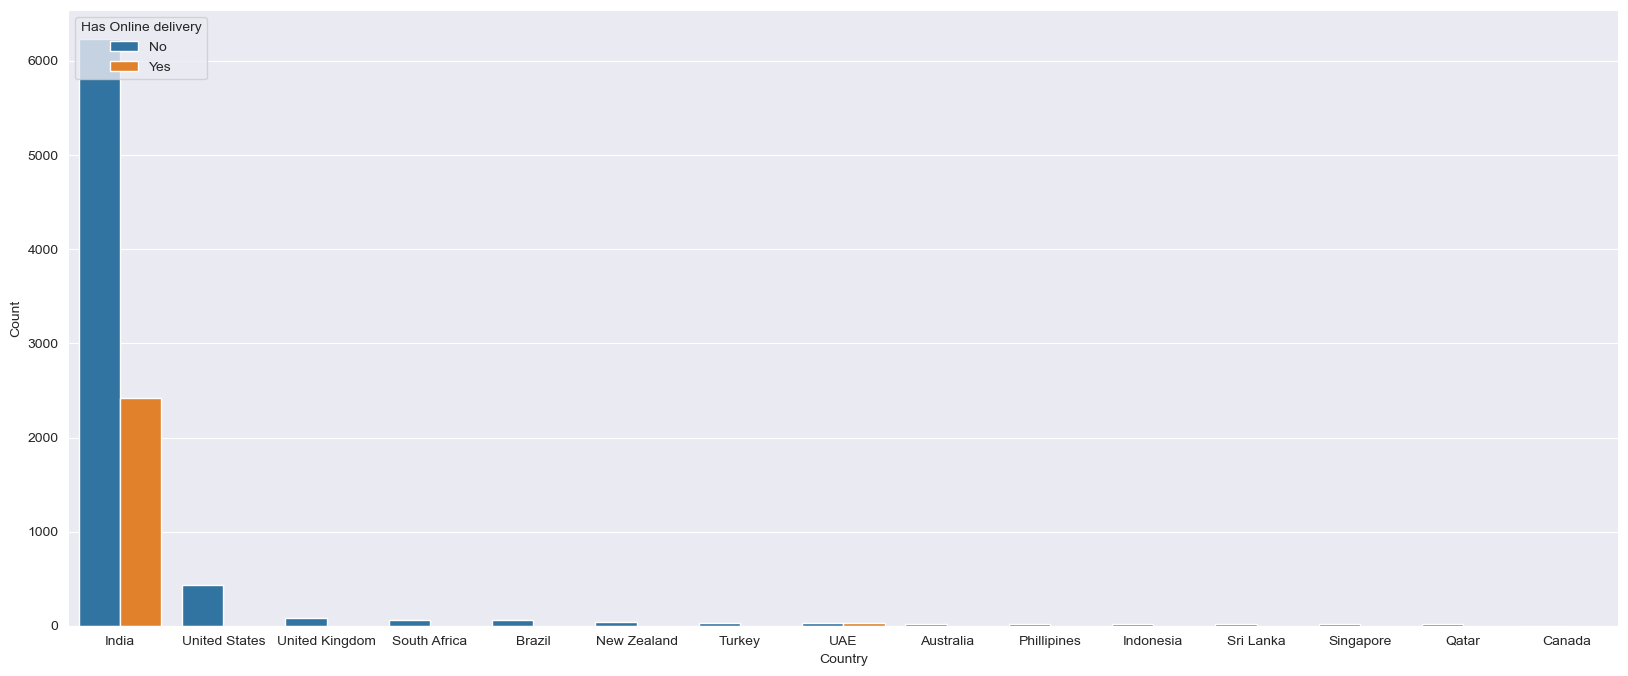

In [28]:
plt.figure(figsize=(20,8))
sns.barplot(x='Country',y='Count',hue='Has Online delivery',data=country)

from the above information we can say that most of online delivery buisness is comming from India

In [29]:
city=df2.groupby(['City','Has Online delivery']).size().sort_values(ascending=False).reset_index().rename(columns={0:"Count"})
city

City Has Online delivery  Count
0          New Delhi                  No   3984
1          New Delhi                 Yes   1489
2              Noida                  No    716
3            Gurgaon                  No    693
4            Gurgaon                 Yes    425
..               ...                 ...    ...
157         Cochrane                  No      1
158      Quezon City                  No      1
159  Middleton Beach                  No      1
160         Randburg                  No      1
161           Penola                  No      1

[162 rows x 3 columns]

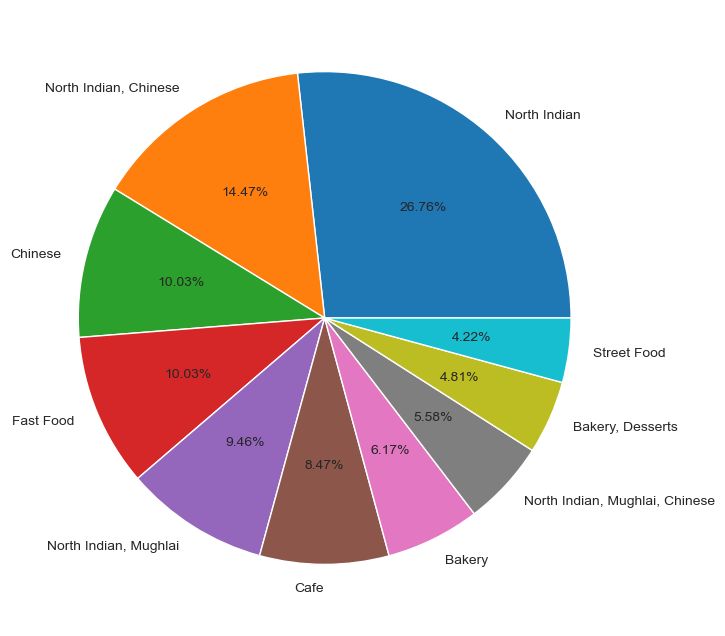

In [30]:
# most order Cuisines
plt.figure(figsize=(10,8))
plt.pie(df2['Cuisines'].value_counts().values[:10],labels=df['Cuisines'].value_counts().index[:10],autopct='%1.2f%%')
plt.show()

this is the top 10 cuisines order and top of the cuisines order is NorthIndian than chinese

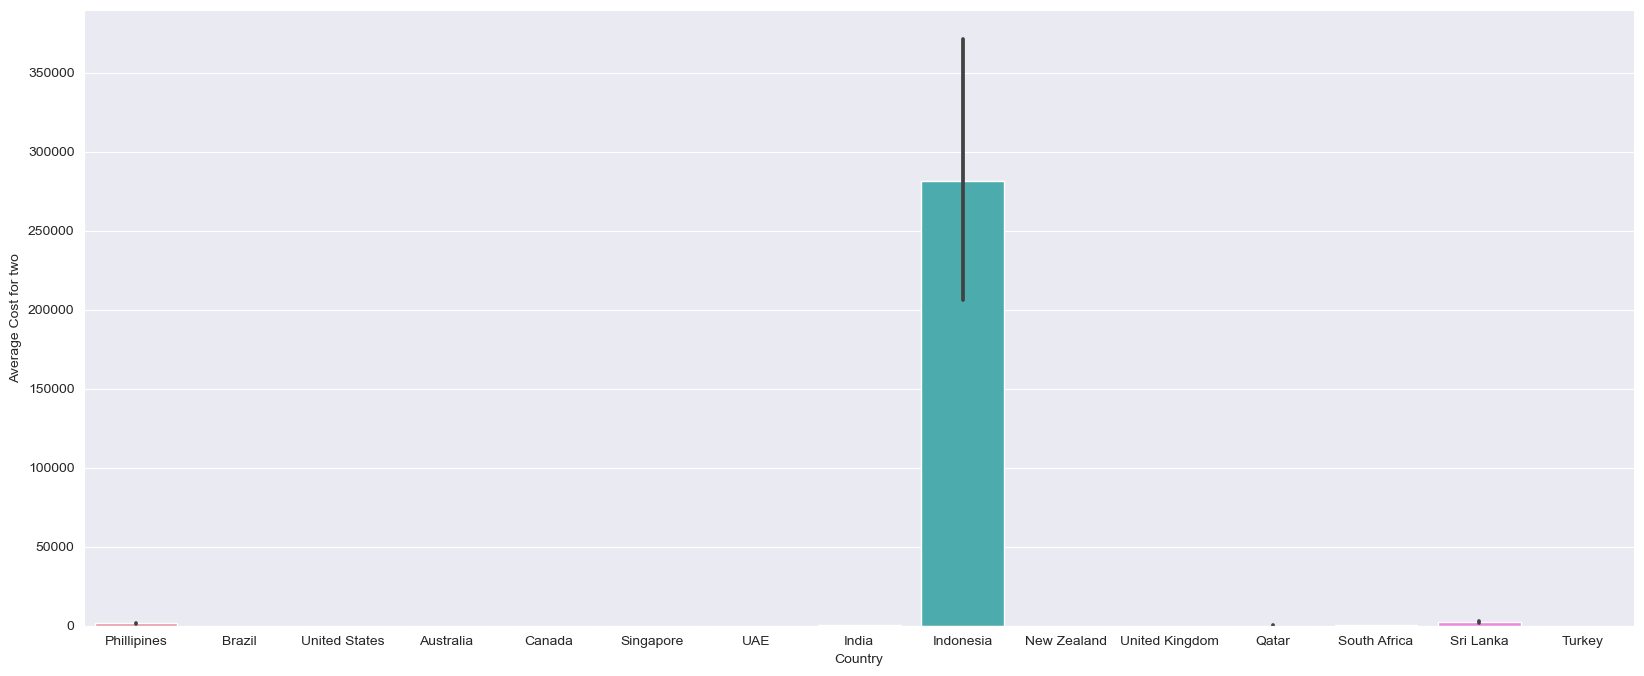

In [31]:
plt.figure(figsize=(20,8))
sns.barplot(df2['Country'],df2['Average Cost for two'])
plt.show()

In [32]:
cost=df2.groupby('Country')[['Average Cost for two']].sum()
cost

Average Cost for two
Country                             
Australia                        578
Brazil                          8080
Canada                           145
India                        5393400
Indonesia                    5905000
New Zealand                     2790
Phillipines                    35350
Qatar                           4475
Singapore                       3115
South Africa                   25184
Sri Lanka                      47500
Turkey                          2885
UAE                             9985
United Kingdom                  3825
United States                  11350

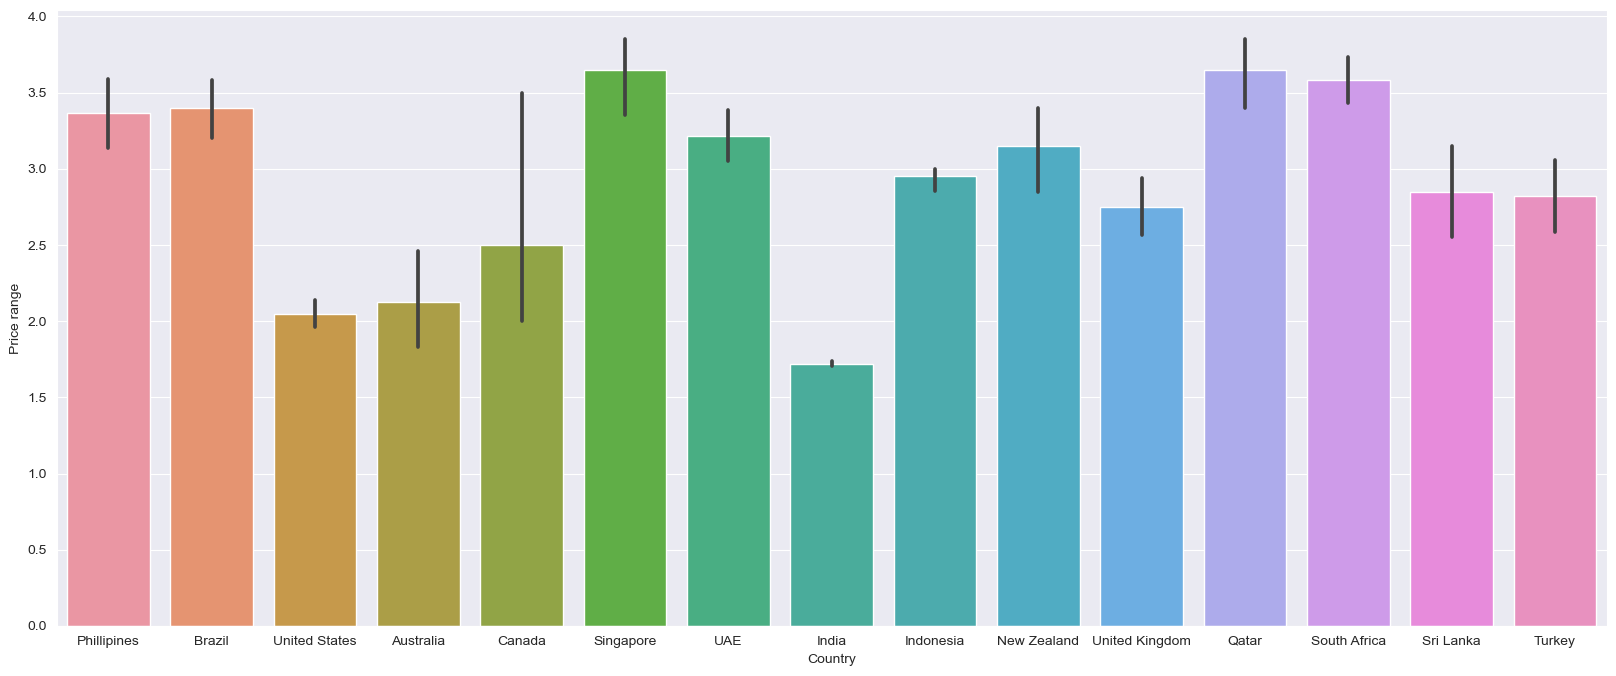

In [33]:
# visualization country with price range
plt.figure(figsize=(20,8))
sns.barplot(df2['Country'],df2['Price range'])
plt.show()

In [34]:
price=df2.groupby(['Country','Price range']).size().sort_values(ascending=False).reset_index().rename(columns={0:"Count"})
price

Country  Price range  Count
0            India            1   4295
1            India            2   2858
2            India            3   1111
3            India            4    388
4    United States            2    165
5    United States            1    136
6    United States            3    110
7     South Africa            4     39
8           Brazil            4     35
9   United Kingdom            3     32
10             UAE            3     29
11  United Kingdom            2     28
12   United States            4     23
13             UAE            4     22
14       Indonesia            3     20
15          Turkey            3     18
16    South Africa            3     17
17     New Zealand            3     17
18          Brazil            3     16
19  United Kingdom            4     16
20     New Zealand            4     16
21       Australia            2     14
22           Qatar            4     14
23       Singapore            4     14
24     Phillipines            3     12
25          Turkey            2     11
26       Sri Lanka            3     11
27             UAE            2      9
28     Phillipines            4      9
29          Brazil            2      7
30       Sri Lanka            2      6
31          Turkey            4      5
32           Qatar            3      5
33       Singapore            3      5
34       Australia            3      5
35    South Africa            2      4
36     New Zealand            2      4
37  United Kingdom            1      4
38       Australia            1      4
39       Sri Lanka            4      3
40     New Zealand            1      3
41          Canada            2      3
42          Brazil            1      2
43       Singapore            2      1
44           Qatar            2      1
45     Phillipines            2      1
46       Indonesia            2      1
47          Canada            4      1
48       Australia            4      1

# pie plot for price range

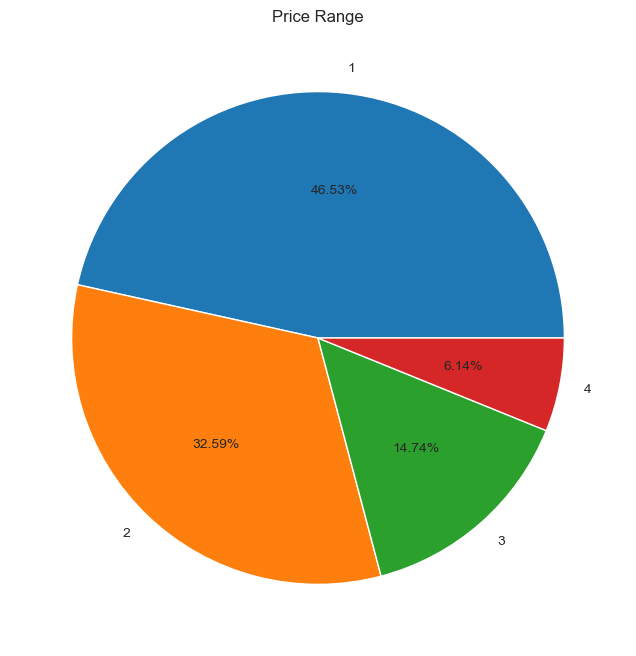

In [35]:
plt.figure(figsize=(8,8))
plt.pie(df2['Price range'].value_counts()/9551*100,labels=df2['Price range'].value_counts().index,autopct='%1.2f%%')
plt.title("Price Range")
plt.show()

# pie plot for switch to order menu

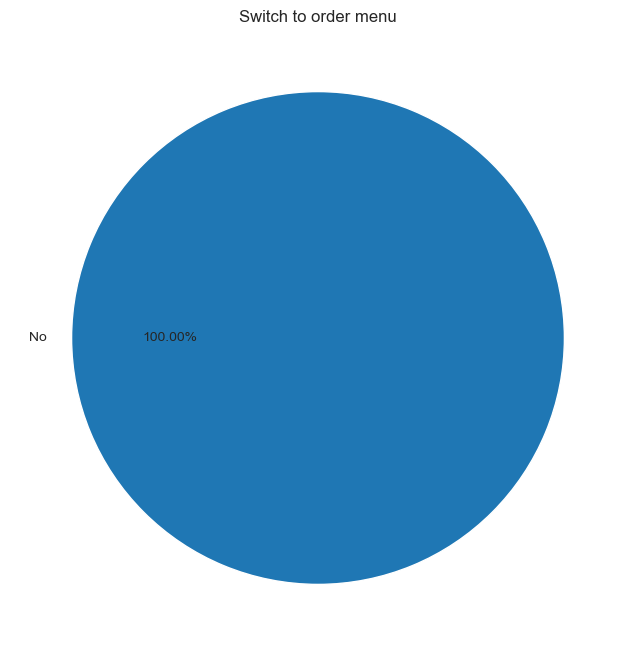

In [36]:
plt.figure(figsize=(8,8))
plt.pie(df2['Switch to order menu'].value_counts()/9551*100,labels=df2['Switch to order menu'].value_counts().index,autopct='%1.2f%%')
plt.title("Switch to order menu")
plt.show()

# pie plot for has table booking

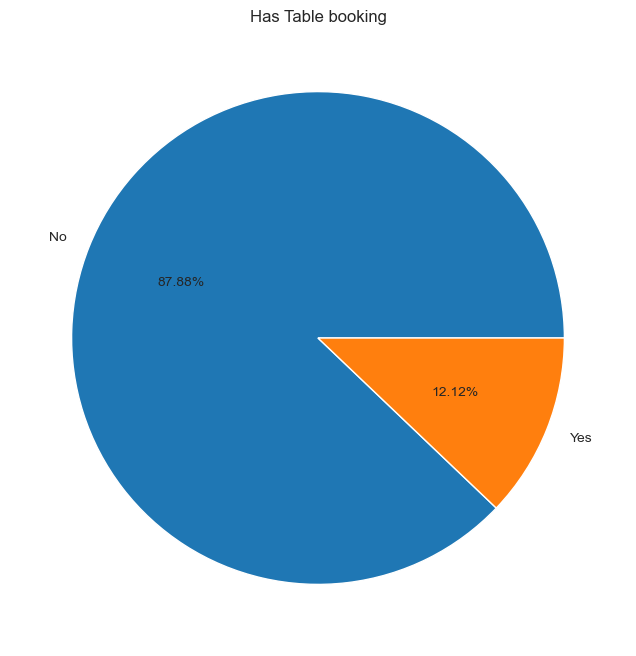

In [37]:
plt.figure(figsize=(8,8))
plt.pie(df2['Has Table booking'].value_counts()/9551*100,labels=df2['Has Table booking'].value_counts().index,autopct='%1.2f%%')
plt.title("Has Table booking")
plt.show()

only 12% of the restaurtant are accepted table booking

# pie plot for is delivering now

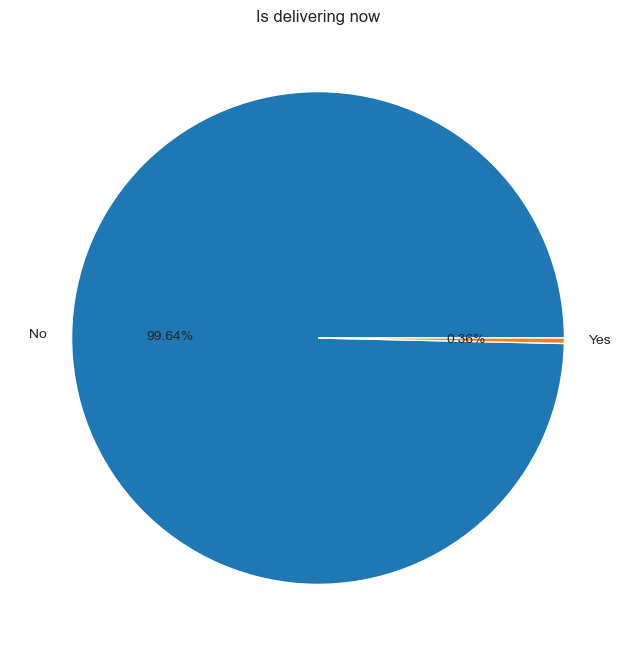

In [38]:
plt.figure(figsize=(8,8))
plt.pie(df2['Is delivering now'].value_counts()/9551*100,labels=df2['Is delivering now'].value_counts().index,autopct='%1.2f%%')
plt.title("Is delivering now")
plt.show()

very least restaurtant is available for ' Is delivery Now'

# Dropping unneccesary column

1. we will Drop Restaurant Name beacuse we have Restaurant id
2. we will Drop  city,Adress and Locality verbose because we have lattitude and longitude
3. we will drop Country beacuse we have Country code
4. we will drop Rating color and Rating text  because these are similar
5. we will drop votes

In [39]:
col=['Restaurant Name', 'City', 'Address',
       'Locality Verbose', 'Rating color', 'Rating text',
       'Votes','Locality','Country']

In [40]:
for i in col:
    df2.drop([i],axis=1,inplace=True)

In [41]:
df2

Restaurant ID  Country Code   Longitude   Latitude  \
0           6317637           162  121.027535  14.565443   
1           6304287           162  121.014101  14.553708   
2           6300002           162  121.056831  14.581404   
3           6318506           162  121.056475  14.585318   
4           6314302           162  121.057508  14.584450   
...             ...           ...         ...        ...   
9546        5915730           208   28.977392  41.022793   
9547        5908749           208   29.041297  41.009847   
9548        5915807           208   29.034640  41.055817   
9549        5916112           208   29.036019  41.057979   
9550        5927402           208   29.026016  40.984776   

                              Cuisines  Average Cost for two  \
0           French, Japanese, Desserts                  1100   
1                             Japanese                  1200   
2     Seafood, Asian, Filipino, Indian                  4000   
3                      Japanese, Sushi                  1500   
4                     Japanese, Korean                  1500   
...                                ...                   ...   
9546                           Turkish                    80   
9547   World Cuisine, Patisserie, Cafe                   105   
9548            Italian, World Cuisine                   170   
9549                   Restaurant Cafe                   120   
9550                              Cafe                    55   

              Currency Has Table booking Has Online delivery  \
0     Botswana Pula(P)               Yes                  No   
1     Botswana Pula(P)               Yes                  No   
2     Botswana Pula(P)               Yes                  No   
3     Botswana Pula(P)                No                  No   
4     Botswana Pula(P)               Yes                  No   
...                ...               ...                 ...   
9546  Turkish Lira(TL)                No                  No   
9547  Turkish Lira(TL)                No                  No   
9548  Turkish Lira(TL)                No                  No   
9549  Turkish Lira(TL)                No                  No   
9550  Turkish Lira(TL)                No                  No   

     Is delivering now Switch to order menu  Price range  Aggregate rating  
0                   No                   No            3               4.8  
1                   No                   No            3               4.5  
2                   No                   No            4               4.4  
3                   No                   No            4               4.9  
4                   No                   No            4               4.8  
...                ...                  ...          ...               ...  
9546                No                   No            3               4.1  
9547                No                   No            3               4.2  
9548                No                   No            4               3.7  
9549                No                   No            4               4.0  
9550                No                   No            2               4.0  

[9551 rows x 13 columns]

In [42]:
cat=['Cuisines', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu','Currency']

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat:
    df2[i]=le.fit_transform(df2[i])

In [44]:
df2

Restaurant ID  Country Code   Longitude   Latitude  Cuisines  \
0           6317637           162  121.027535  14.565443       920   
1           6304287           162  121.014101  14.553708      1111   
2           6300002           162  121.056831  14.581404      1671   
3           6318506           162  121.056475  14.585318      1126   
4           6314302           162  121.057508  14.584450      1122   
...             ...           ...         ...        ...       ...   
9546        5915730           208   28.977392  41.022793      1813   
9547        5908749           208   29.041297  41.009847      1824   
9548        5915807           208   29.034640  41.055817      1110   
9549        5916112           208   29.036019  41.057979      1657   
9550        5927402           208   29.026016  40.984776       331   

      Average Cost for two  Currency  Has Table booking  Has Online delivery  \
0                     1100         0                  1                    0   
1                     1200         0                  1                    0   
2                     4000         0                  1                    0   
3                     1500         0                  0                    0   
4                     1500         0                  1                    0   
...                    ...       ...                ...                  ...   
9546                    80        11                  0                    0   
9547                   105        11                  0                    0   
9548                   170        11                  0                    0   
9549                   120        11                  0                    0   
9550                    55        11                  0                    0   

      Is delivering now  Switch to order menu  Price range  Aggregate rating  
0                     0                     0            3               4.8  
1                     0                     0            3               4.5  
2                     0                     0            4               4.4  
3                     0                     0            4               4.9  
4                     0                     0            4               4.8  
...                 ...                   ...          ...               ...  
9546                  0                     0            3               4.1  
9547                  0                     0            3               4.2  
9548                  0                     0            4               3.7  
9549                  0                     0            4               4.0  
9550                  0                     0            2               4.0  

[9551 rows x 13 columns]

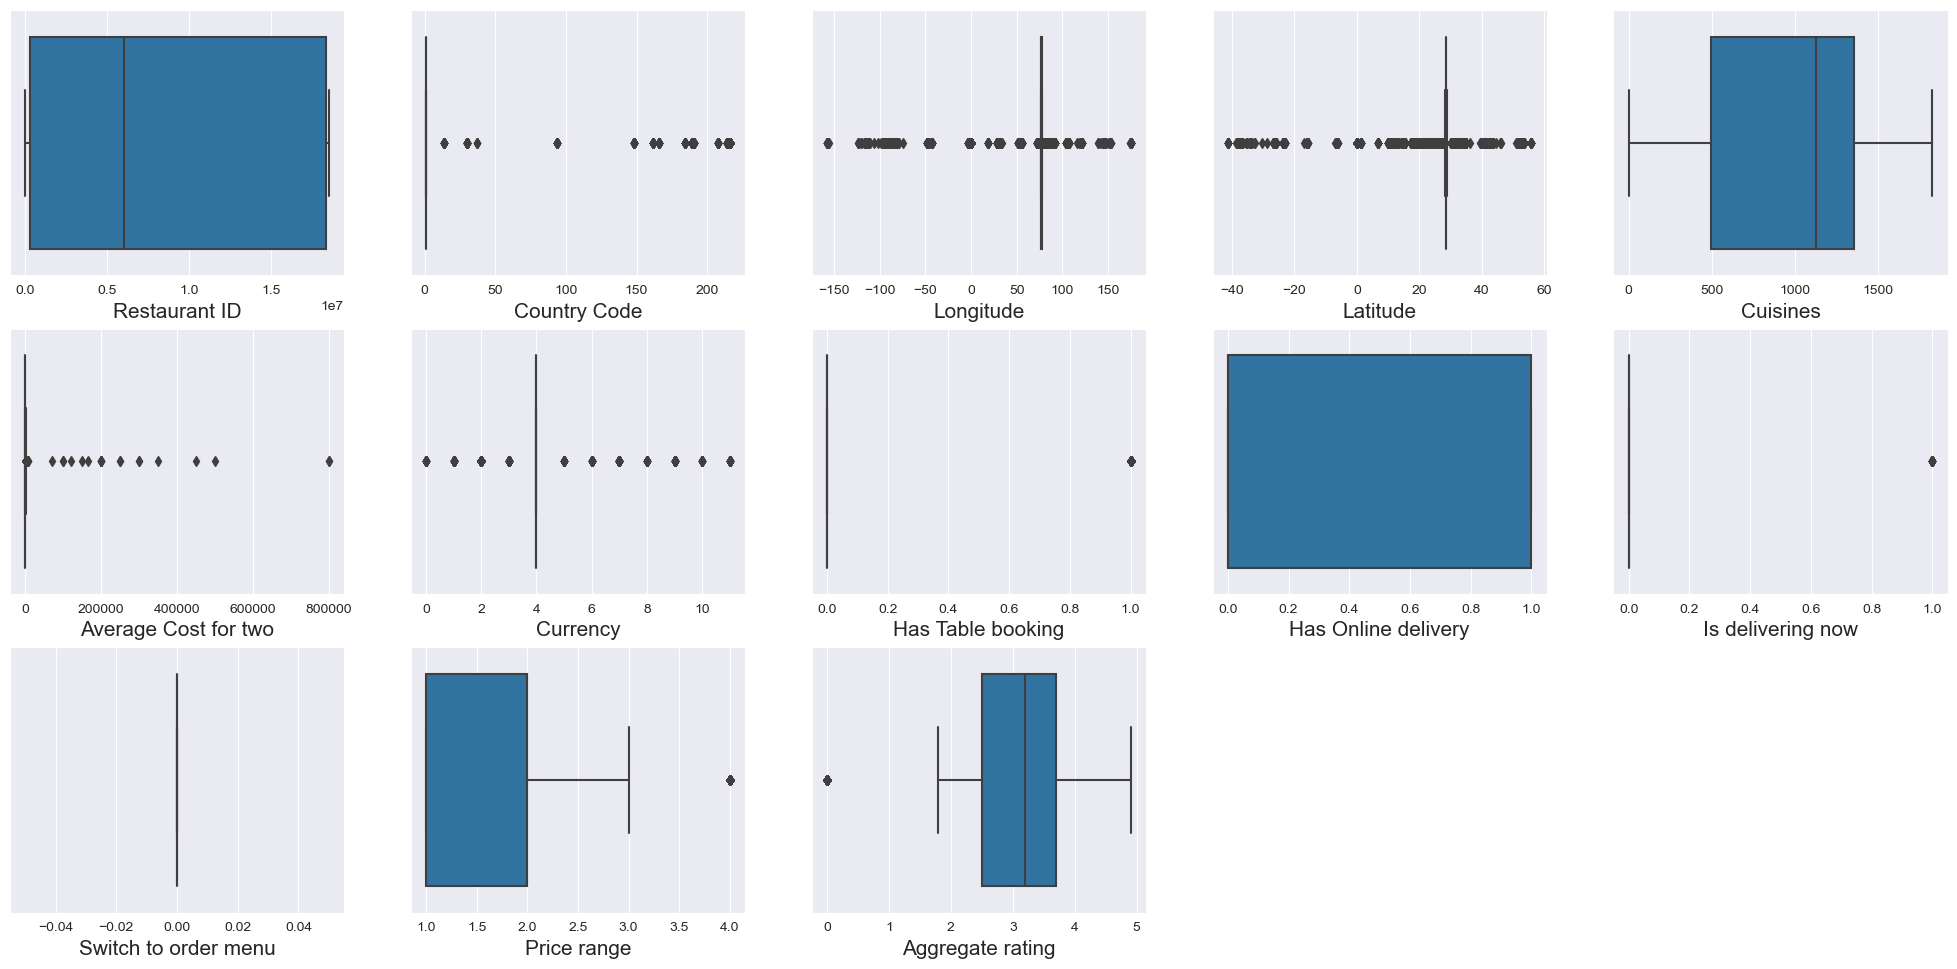

In [45]:
plt.figure(figsize=(25,20))
plotnumber=1


for col in df2.columns:
    if plotnumber <= 24:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(df2[col])
        plt.xlabel(col,fontsize=15)
        
    plotnumber +=1  

# Feature Scaling

In [46]:
x=df2.drop(['Average Cost for two','Price range'],axis=1)

In [47]:
x

Restaurant ID  Country Code   Longitude   Latitude  Cuisines  Currency  \
0           6317637           162  121.027535  14.565443       920         0   
1           6304287           162  121.014101  14.553708      1111         0   
2           6300002           162  121.056831  14.581404      1671         0   
3           6318506           162  121.056475  14.585318      1126         0   
4           6314302           162  121.057508  14.584450      1122         0   
...             ...           ...         ...        ...       ...       ...   
9546        5915730           208   28.977392  41.022793      1813        11   
9547        5908749           208   29.041297  41.009847      1824        11   
9548        5915807           208   29.034640  41.055817      1110        11   
9549        5916112           208   29.036019  41.057979      1657        11   
9550        5927402           208   29.026016  40.984776       331        11   

      Has Table booking  Has Online delivery  Is delivering now  \
0                     1                    0                  0   
1                     1                    0                  0   
2                     1                    0                  0   
3                     0                    0                  0   
4                     1                    0                  0   
...                 ...                  ...                ...   
9546                  0                    0                  0   
9547                  0                    0                  0   
9548                  0                    0                  0   
9549                  0                    0                  0   
9550                  0                    0                  0   

      Switch to order menu  Aggregate rating  
0                        0               4.8  
1                        0               4.5  
2                        0               4.4  
3                        0               4.9  
4                        0               4.8  
...                    ...               ...  
9546                     0               4.1  
9547                     0               4.2  
9548                     0               3.7  
9549                     0               4.0  
9550                     0               4.0  

[9551 rows x 11 columns]

In [48]:
y=df2[['Average Cost for two','Price range']]
y

Average Cost for two  Price range
0                     1100            3
1                     1200            3
2                     4000            4
3                     1500            4
4                     1500            4
...                    ...          ...
9546                    80            3
9547                   105            3
9548                   170            4
9549                   120            4
9550                    55            2

[9551 rows x 2 columns]

In [49]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

In [50]:
x=st.fit_transform(x)
x

array([[-0.31093987,  2.53111053,  1.37226856, ..., -0.05977085,
         0.        ,  1.4071309 ],
       [-0.31245846,  2.53111053,  1.37194457, ..., -0.05977085,
         0.        ,  1.20928063],
       [-0.31294588,  2.53111053,  1.37297508, ..., -0.05977085,
         0.        ,  1.14333054],
       ...,
       [-0.3566488 ,  3.34171786, -0.84630484, ..., -0.05977085,
         0.        ,  0.68167991],
       [-0.3566141 ,  3.34171786, -0.84627158, ..., -0.05977085,
         0.        ,  0.87953018],
       [-0.35532984,  3.34171786, -0.84651282, ..., -0.05977085,
         0.        ,  0.87953018]])

# splitting the data into train and test

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)


In [53]:
print(x_train.shape),print(x_test.shape),print(y_train.shape),print(y_test.shape)


(7640, 11)
(1911, 11)
(7640, 2)
(1911, 2)


(None, None, None, None)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score

# Linear Regression

In [55]:
lr=LinearRegression()


In [56]:
from sklearn.multioutput import MultiOutputRegressor

In [57]:
multi=MultiOutputRegressor(lr)

In [58]:
multi.fit(x_train,y_train)

MultiOutputRegressor(estimator=LinearRegression())

In [59]:
predmulti=multi.predict(x_test)

In [60]:
pred_trainmulti=multi.predict(x_train)
print("r2_score:", r2_score(y_test,predmulti))
print("r2_score on training data:", r2_score(y_train,pred_trainmulti))
print("Mean Squared Error:", mean_squared_error(y_test,predmulti))
print("Mean Absolute Error:", mean_absolute_error(y_test,predmulti))
print("root mean squared erroe:", np.sqrt(mean_squared_error(y_test,predmulti)))
print("Mape:", mean_absolute_percentage_error(y_test,predmulti))

r2_score: 0.23725885116117817
r2_score on training data: 0.24205497454784686
Mean Squared Error: 186745367.29433274
Mean Absolute Error: 931.9516080168144
root mean squared erroe: 13665.48086582879
Mape: 5266263245192378.0


In [61]:
from sklearn.svm import SVR
svm=SVR()

In [62]:
multi=MultiOutputRegressor(svm)
multi.fit(x_train,y_train)
predmulti=multi.predict(x_test)
pred_trainmulti=multi.predict(x_train)
print("r2_score:", r2_score(y_test,predmulti))
print("r2_score on training data:", r2_score(y_train,pred_trainmulti))
print("Mean Squared Error:", mean_squared_error(y_test,predmulti))
print("Mean Absolute Error:", mean_absolute_error(y_test,predmulti))
print("root mean squared erroe:", np.sqrt(mean_squared_error(y_test,predmulti)))
print("Mape:", mean_absolute_percentage_error(y_test,predmulti))

r2_score: 0.25888840269220204
r2_score on training data: 0.2545795830818587
Mean Squared Error: 190840205.79447126
Mean Absolute Error: 475.8846109902145
root mean squared erroe: 13814.492599964404
Mape: 788383310515454.4


# KNN

In [63]:
knn=KNeighborsRegressor()

In [64]:
multi=MultiOutputRegressor(knn)
multi.fit(x_train,y_train)
predmulti=multi.predict(x_test)
pred_trainmulti=multi.predict(x_train)
print("r2_score:", r2_score(y_test,predmulti))
print("r2_score on training data:", r2_score(y_train,pred_trainmulti))
print("Mean Squared Error:", mean_squared_error(y_test,predmulti))
print("Mean Absolute Error:", mean_absolute_error(y_test,predmulti))
print("root mean squared erroe:", np.sqrt(mean_squared_error(y_test,predmulti)))
print("Mape:", mean_absolute_percentage_error(y_test,predmulti))

r2_score: 0.4505589225795439
r2_score on training data: 0.7354132820067117
Mean Squared Error: 129508143.19582418
Mean Absolute Error: 375.39136577708007
root mean squared erroe: 11380.16446260001
Mape: 1146520784257324.5


# RandomForestRegressor

In [65]:
rf=RandomForestRegressor()

In [66]:
multi=MultiOutputRegressor(rf)
multi.fit(x_train,y_train)
predmulti=multi.predict(x_test)
pred_trainmulti=multi.predict(x_train)
print("r2_score:", r2_score(y_test,predmulti))
print("r2_score on training data:", r2_score(y_train,pred_trainmulti))
print("Mean Squared Error:", mean_squared_error(y_test,predmulti))
print("Mean Absolute Error:", mean_absolute_error(y_test,predmulti))
print("root mean squared erroe:", np.sqrt(mean_squared_error(y_test,predmulti)))
print("Mape:", mean_absolute_percentage_error(y_test,predmulti))

r2_score: 0.47091577382153393
r2_score on training data: 0.9512761242440746
Mean Squared Error: 132518704.46698521
Mean Absolute Error: 400.0500052328623
root mean squared erroe: 11511.676874677521
Mape: 1120243894751735.0


# AdaBoostRegressor

In [67]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()

In [68]:
multi=MultiOutputRegressor(ada)
multi.fit(x_train,y_train)
predmulti=multi.predict(x_test)
pred_trainmulti=multi.predict(x_train)
print("r2_score of ada:", r2_score(y_test,predmulti))
print("r2_score on training data of ada:", r2_score(y_train,pred_trainmulti))
print("Mean Squared Error of ada:", mean_squared_error(y_test,predmulti))
print("Mean Absolute Error of ada:", mean_absolute_error(y_test,predmulti))
print("root mean squared erroe of ada:", np.sqrt(mean_squared_error(y_test,predmulti)))
print("Mape of ada:", mean_absolute_percentage_error(y_test,predmulti))

r2_score of ada: 0.5291682354069263
r2_score on training data of ada: 0.7171742677342038
Mean Squared Error of ada: 76906801.28104213
Mean Absolute Error of ada: 406.84080237967424
root mean squared erroe of ada: 8769.652289631678
Mape of ada: 1082095145335420.0


In [69]:
from sklearn.model_selection import GridSearchCV


# DecisionTreeRegressor

In [70]:
from sklearn.tree import DecisionTreeRegressor
Dtc=DecisionTreeRegressor()

In [71]:
multi=MultiOutputRegressor(dtc)
multi.fit(x_train,y_train)
predmulti=multi.predict(x_test)
pred_trainmulti=multi.predict(x_train)
print("r2_score of dtc:", r2_score(y_test,predmulti))
print("r2_score on training data of dtc:", r2_score(y_train,pred_trainmulti))
print("Mean Squared Error of dtc:", mean_squared_error(y_test,predmulti))
print("Mean Absolute Error of dtc:", mean_absolute_error(y_test,predmulti))
print("root mean squared erroe of dtc:", np.sqrt(mean_squared_error(y_test,predmulti)))
print("Mape of dtc:", mean_absolute_percentage_error(y_test,predmulti))

NameError: name 'dtc' is not defined

# Gradient Boosting Regresor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

In [ ]:
multi=MultiOutputRegressor(gbr)
multi.fit(x_train,y_train)
predmulti=multi.predict(x_test)
pred_trainmulti=multi.predict(x_train)
print("r2_score of gbr:", r2_score(y_test,predmulti))
print("r2_score on training data of gbr:", r2_score(y_train,pred_trainmulti))
print("Mean Squared Error of gbr:", mean_squared_error(y_test,predmulti))
print("Mean Absolute Error of gbr:", mean_absolute_error(y_test,predmulti))
print("root mean squared erroe of gbr:", np.sqrt(mean_squared_error(y_test,predmulti)))
print("Mape of gbr:", mean_absolute_percentage_error(y_test,predmulti))

# ExtraTreeRegressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etc=ExtraTreesRegressor()

In [ ]:
multi=MultiOutputRegressor(etc)
multi.fit(x_train,y_train)
predmulti=multi.predict(x_test)
pred_trainmulti=multi.predict(x_train)
print("r2_score of etc:", r2_score(y_test,predmulti))
print("r2_score on training data of etc:", r2_score(y_train,pred_trainmulti))
print("Mean Squared Error of etc:", mean_squared_error(y_test,predmulti))
print("Mean Absolute Error of etc:", mean_absolute_error(y_test,predmulti))
print("root mean squared erroe of etc:", np.sqrt(mean_squared_error(y_test,predmulti)))
print("Mape of etc:", mean_absolute_percentage_error(y_test,predmulti))

In [ ]:
from sklearn.model_selection import GridSearchCV
ls=Lasso()
parameter1={"alpha":[1,.1,.01,.001,.0001]}
gsv=GridSearchCV(estimator=ls,param_grid=parameter1)
gsv.fit(x,y)
print(gsv.best_params_)
print(gsv.best_score_)

In [ ]:

multi=MultiOutputRegressor(ls)
multi.fit(x_train,y_train)
predmulti=multi.predict(x_test)
pred_trainmulti=multi.predict(x_train)
print("r2_score of Lasso:", r2_score(y_test,predmulti))
print("r2_score on training data of Lasso:", r2_score(y_train,pred_trainmulti))
print("Mean Squared Error of Lasso:", mean_squared_error(y_test,predmulti))
print("Mean Absolute Error of Lasso:", mean_absolute_error(y_test,predmulti))
print("root mean squared erroe of Lasso:", np.sqrt(mean_squared_error(y_test,predmulti)))
print("Mape of Lasso:", mean_absolute_percentage_error(y_test,predmulti))